In [136]:
import nltk
from nltk.stem import WordNetLemmatizer
import bs4 
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt

# Scraping Data From Beautiful Soup

In [56]:
url = 'https://en.wikipedia.org/wiki/SpaceX'
response = requests.get(url).text

soup = BeautifulSoup(response ,'lxml')

ps = soup.find_all('p')

content = str('')
for i in ps:
    
    content = content+ str(i.text)
content

'\nSpace Exploration Technologies Corp., trading as SpaceX, is a private American aerospace manufacturer and space transportation services company headquartered in Hawthorne, California. It was founded in 2002 by Elon Musk with the goal of reducing space transportation costs to enable the colonization of Mars.[7][8][9] SpaceX has developed several launch vehicles and the Dragon spacecraft.\nSpaceX\'s achievements include the first privately funded liquid-propellant rocket to reach orbit (Falcon 1 in 2008),[10] the first private company to successfully launch, orbit, and recover a spacecraft (Dragon in 2010), the first private company to send a spacecraft to the International Space Station (Dragon in 2012),[11] the first propulsive landing for an orbital rocket (Falcon 9 in 2015), the first reuse of an orbital rocket (Falcon 9 in 2017), and the first private company to launch an object into orbit around the sun (Falcon Heavy\'s payload of a Tesla Roadster in 2018). SpaceX has flown 20[1

# Text Preprocessing

In [57]:
# lets remove the [123] and * which is default when default is extracted from the wikkipedia
import re
formated_text  =re.sub(r'([[0-9]*])',' ',content)
formated_text = formated_text.replace('\n',' ')
formated_text = formated_text.replace('\ ',' ')

In [65]:
line = nltk.sent_tokenize(formated_text)
line

[' Space Exploration Technologies Corp., trading as SpaceX, is a private American aerospace manufacturer and space transportation services company headquartered in Hawthorne, California.',
 'It was founded in 2002 by Elon Musk with the goal of reducing space transportation costs to enable the colonization of Mars.',
 'SpaceX has developed several launch vehicles and the Dragon spacecraft.',
 "SpaceX's achievements include the first privately funded liquid-propellant rocket to reach orbit (Falcon 1 in 2008),  the first private company to successfully launch, orbit, and recover a spacecraft (Dragon in 2010), the first private company to send a spacecraft to the International Space Station (Dragon in 2012),  the first propulsive landing for an orbital rocket (Falcon 9 in 2015), the first reuse of an orbital rocket (Falcon 9 in 2017), and the first private company to launch an object into orbit around the sun (Falcon Heavy's payload of a Tesla Roadster in 2018).",
 'SpaceX has flown   resu

In [97]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)


words = nltk.word_tokenize(formated_text)  
print('\nNumber of words and charaters in formated text:- ',len(words))

{'any', "needn't", 'who', 'below', 'him', 'themselves', 'couldn', 'now', 'own', "shouldn't", "should've", 'i', 'by', 'once', 'too', 'on', 'very', 'ours', 'for', 'had', 'these', "hadn't", 'are', 'down', 'after', 'hers', 'their', 'but', 'than', 'wasn', 'it', 've', "isn't", 'here', "mightn't", "you've", 'not', 'while', 'off', "hasn't", 'from', 'to', 'theirs', 'herself', 'aren', 'his', 'of', 'our', 'was', 'further', 'were', 'only', 'didn', "weren't", 'both', 'did', 'can', 'my', 'there', 'few', 'he', 'where', "she's", 'weren', 'does', 'under', 'if', 're', 'shouldn', 'as', 'her', 'have', 'doing', 'be', 'up', 'no', 'isn', 'during', 'your', 'its', 'ain', 'she', 'this', "won't", "couldn't", 'those', 'yourselves', "doesn't", 'that', 'the', "it's", 'such', "didn't", 'me', 'most', 't', "you're", 'won', 'an', 'out', 'then', 'whom', 'which', 'above', 'itself', 'being', 'you', 'should', "haven't", 'them', 'nor', 'each', 'because', 'doesn', 'more', "aren't", 'myself', 'do', 'needn', "you'll", 'so', 'u

In [98]:
formated_word = []
for i in  words:
    if i not in stop_words:
        formated_word.append(i)
    else:
        None
print('Formated_ word length ',len(formated_word))
print('{} is the number of unwanted words which is removed '.format(len(words)-len(formated_word)))

Formated_ word length  6386
2528 is the number of unwanted words which is removed 


In [99]:
# we coul remove words of len 1 and 2 since majority of words contain is , a and single characters.
for i in range(len(formated_word)):
    if len(formated_word)==1 or len(formated_word)==2:
        del formated_word[i]

# Compliation

In [115]:
freq_word = nltk.FreqDist(formated_word)
di = {'Words':[],'Frequency' :[]}

di['Words'] = [w for w in freq_word.keys()]  
di['Frequency'] = [c for c in freq_word.values()]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

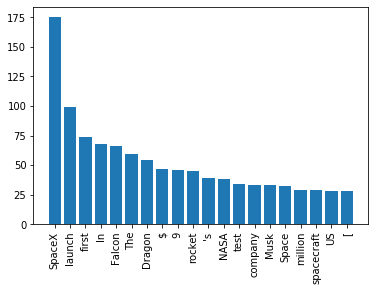

In [137]:
df = pd.DataFrame(di)
df = df.sort_values('Frequency',ascending=False)
df =  df.loc[df.Words !='.']
df = df.loc[df.Words != ',']
df = df.loc[df.Words != '(']
df = df.loc[df.Words != ')']
df= df.head(20)
plt.bar(df['Words'],df['Frequency'])
plt.xticks(rotation='vertical')

# Conclusion

<b>SpaceX, launch,Falcon,rocket ,NASA spacecraft etc</b> word only symbolizes that this <b> article</b> belongs to <b>Space Relted activites</b>
    
 <b> 
    SapceX Spacecraft </b> suits the topic of the Article . !
    


  